<a href="https://colab.research.google.com/github/vaibhavpec2012/ECE1512---Homewrok2/blob/master/Copy_of_modelzoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lucid Modelzoo

If you want to study techniques for visualizing and understanding neural networks, it's important to be able to try your experiments on multiple models.

 [Lucid](https://github.com/tensorflow/lucid) is a library for visualizing neurla networks.
 As of lucid v0.3, we provide a consistent API for interacting with 27 different vision models.



## General Setup

In [1]:
# Expanded modelzoo is only available as of lucid v0.3
!pip install --quiet lucid==0.3

import numpy as np
import tensorflow as tf
import scipy.ndimage as nd
from lucid.misc.io import show, load
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

    100% |████████████████████████████████| 51kB 2.5MB/s 


## Import Modelzoo

In [0]:
# Lucid's modelzoo can be accessed as classes in vision_models
import lucid.modelzoo.vision_models as models

In [0]:
model = models.InceptionV1()
model.load_graphdef()


In [17]:
model.layers

[{'name': 'conv2d0', 'size': 64, 'type': 'conv'},
 {'name': 'conv2d1', 'size': 64, 'type': 'conv'},
 {'name': 'conv2d2', 'size': 192, 'type': 'conv'},
 {'name': 'mixed3a', 'size': 256, 'type': 'conv'},
 {'name': 'mixed3b', 'size': 480, 'type': 'conv'},
 {'name': 'mixed4a', 'size': 508, 'type': 'conv'},
 {'name': 'mixed4b', 'size': 512, 'type': 'conv'},
 {'name': 'mixed4c', 'size': 512, 'type': 'conv'},
 {'name': 'mixed4d', 'size': 528, 'type': 'conv'},
 {'name': 'mixed4e', 'size': 832, 'type': 'conv'},
 {'name': 'mixed5a', 'size': 832, 'type': 'conv'},
 {'name': 'mixed5b', 'size': 1024, 'type': 'conv'},
 {'name': 'head0_bottleneck', 'size': 128, 'type': 'conv'},
 {'name': 'nn0', 'size': 1024, 'type': 'dense'},
 {'name': 'softmax0', 'size': 1008, 'type': 'dense'},
 {'name': 'head1_bottleneck', 'size': 128, 'type': 'conv'},
 {'name': 'nn1', 'size': 1024, 'type': 'dense'},
 {'name': 'softmax1', 'size': 1008, 'type': 'dense'},
 {'name': 'softmax2', 'size': 1008, 'type': 'dense'}]

In [6]:
model.labels[0:10]

[u'dummy',
 u'kit fox',
 u'English setter',
 u'Siberian husky',
 u'Australian terrier',
 u'English springer',
 u'grey whale',
 u'lesser panda',
 u'Egyptian cat',
 u'ibex']

## Visualize Neuron

See the [lucid tutorial](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb) to learn more.

We pick `InceptionV4/InceptionV4/Mixed_6b/concat` from above, and chose to focus on unit 0.

In [0]:
import time

Layers: mixed3a:0
512 194.70006



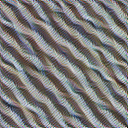

Solve time: 6.25 seconds
Layers: mixed3b:0
512 310.94217



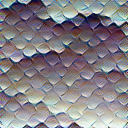

Solve time: 7.57 seconds
Layers: mixed4a:0
512 1185.3597



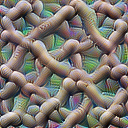

Solve time: 8.81 seconds
Layers: mixed4b:0
512 795.5838



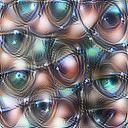

Solve time: 10.75 seconds
Layers: mixed4c:0
512 961.0348



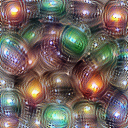

Solve time: 12.16 seconds
Layers: mixed4d:0
512 725.48785



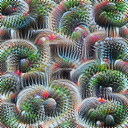

Solve time: 13.77 seconds
Layers: mixed4e:0
512 312.68243



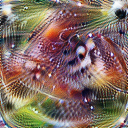

Solve time: 15.63 seconds
Layers: mixed5a:0
512 838.53656



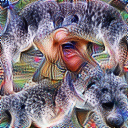

Solve time: 17.43 seconds
Layers: mixed5b:0
512 284.11462



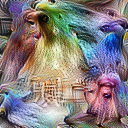

Solve time: 19.38 seconds


In [167]:
layers = ['mixed3a:0' , 'mixed3b:0', 'mixed4a:0', 'mixed4b:0', 'mixed4c:0','mixed4d:0','mixed4e:0','mixed5a:0','mixed5b:0']
ti = []

for i in layers:
  print('Layer: '+i)
  t0 = time.time()
  _ = render.render_vis(model, i)
  t1 = time.time()
  ti.append(round(t1 - t0, 2))
  print('Solve time: {:.2f} seconds'.format(round(t1 - t0, 2)))
  print ""

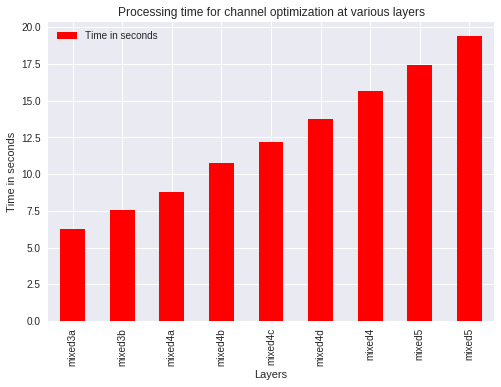

In [178]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(
    {'Layers': layers,
     'Time in seconds': ti
    })


# a scatter plot comparing num_children and num_pets
df.plot(kind='bar',x='Layers',y='Time in seconds',color='red')
plt.ylabel("Time in seconds")
plt.xticks(np.arange(9), ('mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b'))
plt.title("Processing time for positive channel optimization at various layers")
plt.xticks(rotation=90)
plt.show()

Layers: mixed3a
512 386.55472



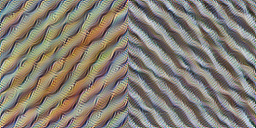

Solve time: 7.38 seconds
Layers: mixed3b
512 526.4209



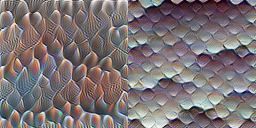

Solve time: 8.90 seconds
Layers: mixed4a
512 1921.2567



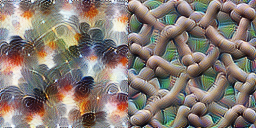

Solve time: 10.22 seconds
Layers: mixed4b
512 1518.1188



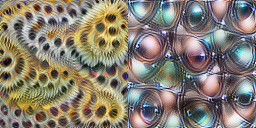

Solve time: 12.23 seconds
Layers: mixed4c
512 1380.8218



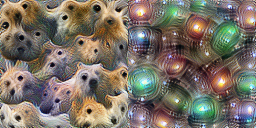

Solve time: 13.69 seconds
Layers: mixed4d
512 1115.8599



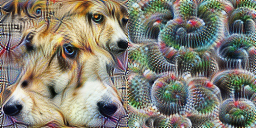

Solve time: 15.52 seconds
Layers: mixed4e
512 526.511



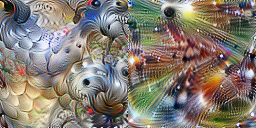

Solve time: 17.17 seconds
Layers: mixed5a
512 1484.1887



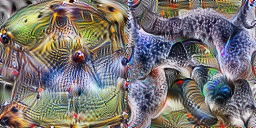

Solve time: 19.15 seconds
Layers: mixed5b
512 539.50793



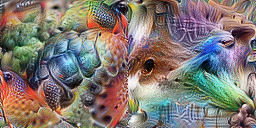

Solve time: 21.48 seconds


In [0]:
layers = ['mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b']
ti = []
for i in layers:
  print('Layer: '+i)
  t0 = time.time()
  obj = objectives.channel(i+"_pre_relu", 0, batch=1) - objectives.channel(i+"_pre_relu", 0, batch=0)
  _ = render.render_vis(model, obj, param_f)
  t1 = time.time()
  ti.append(round(t1 - t0, 2))
  print('Solve time: {:.2f} seconds'.format(round(t1 - t0, 2)))
  print ""

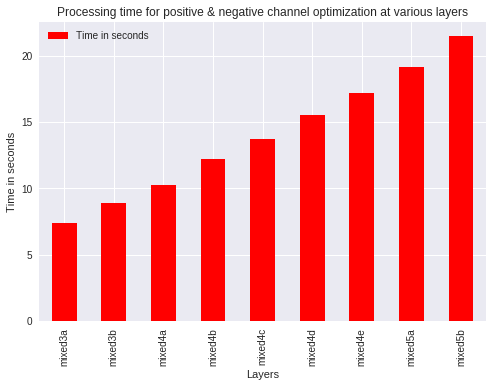

In [181]:
df = pd.DataFrame(
    {'Layers': layers,
     'Time in seconds': ti
    })


# a scatter plot comparing num_children and num_pets
df.plot(kind='bar',x='Layers',y='Time in seconds',color='red')
plt.ylabel("Time in seconds")
plt.xticks(np.arange(9), ('mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b'))
plt.title("Processing time for negative channel optimization at various layers")
plt.xticks(rotation=90)
plt.show()

Layers: mixed3a
512 96.59688



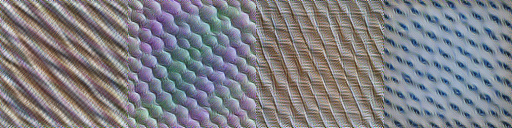

Solve time: 12.68 seconds
Layers: mixed3b
512 198.02158



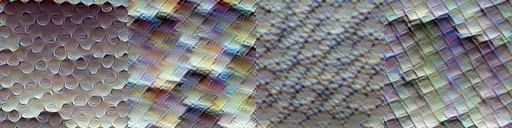

Solve time: 16.62 seconds
Layers: mixed4a
512 1032.6746



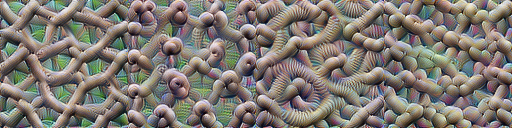

Solve time: 17.75 seconds
Layers: mixed4b
512 729.41565



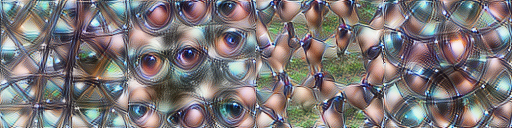

Solve time: 20.00 seconds
Layers: mixed4c
512 842.1122



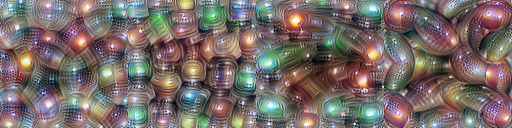

Solve time: 21.74 seconds
Layers: mixed4d
512 464.55237



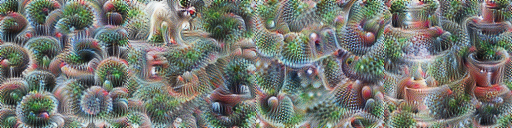

Solve time: 23.75 seconds
Layers: mixed4e
512 251.47404



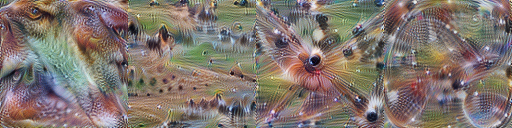

Solve time: 28.59 seconds
Layers: mixed5a
512 625.1566



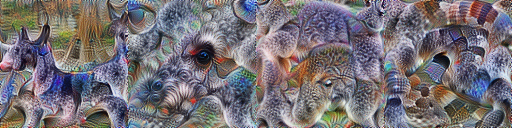

Solve time: 30.01 seconds
Layers: mixed5b
512 139.83098



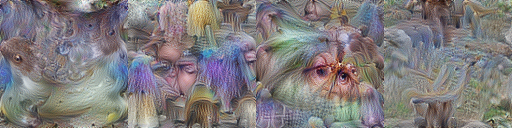

Solve time: 34.47 seconds


In [182]:
layers = ['mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b']
ti = []

for i in layers:
  print('Layer: '+i)
  t0 = time.time()
  param_f = lambda: param.image(128, batch=4)
  obj = objectives.channel(i+"_pre_relu", 0) - 1e2*objectives.diversity(i)
  _ = render.render_vis(model, obj, param_f)
  t1 = time.time()
  ti.append(round(t1 - t0, 2))
  print('Solve time: {:.2f} seconds'.format(round(t1 - t0, 2)))
  print ""

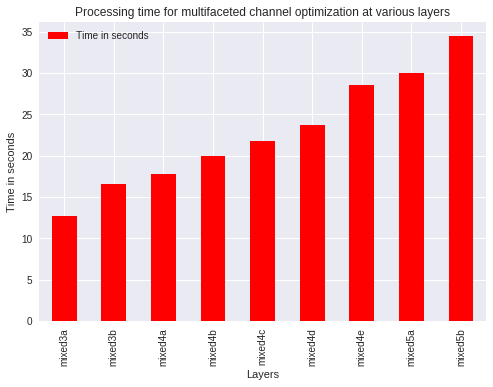

In [183]:
df = pd.DataFrame(
    {'Layers': layers,
     'Time in seconds': ti
    })


# a scatter plot comparing num_children and num_pets
df.plot(kind='bar',x='Layers',y='Time in seconds',color='red')
plt.ylabel("Time in seconds")
plt.xticks(np.arange(9), ('mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e','mixed5a','mixed5b'))
plt.title("Processing time for multifaceted channel optimization at various layers")
plt.xticks(rotation=90)
plt.show()

In [0]:
def imgToModelSize(arr):
  W = model.image_shape[0]
  w, h, _ = arr.shape
  s = float(W) / min(w,h)
  arr = nd.zoom(arr, [s, s, 1], mode="nearest")
  w, h, _ = arr.shape
  dw, dh = (w-W)//2, (h-W)//3
  return arr[dw:dw+W, dh:dh+W]

In [0]:
@objectives.wrap_objective
def dot_compare(layer, batch=1, cossim_pow=0):
  def inner(T):
    dot = tf.reduce_sum(T(layer)[batch] * T(layer)[0])
    mag = tf.sqrt(tf.reduce_sum(T(layer)[0]**2))
    cossim = dot/(1e-6 + mag)
    return dot * cossim ** cossim_pow
  return inner

In [0]:
def feature_inversion(img=None, layer=None, n_steps=512, cossim_pow=0.0):
  with tf.Graph().as_default(), tf.Session() as sess:
    img = imgToModelSize(img)
    
    objective = objectives.Objective.sum([
        1.0 * dot_compare(layer, cossim_pow=cossim_pow),
        objectives.blur_input_each_step(),
    ])

    t_input = tf.placeholder(tf.float32, img.shape)
    param_f = param.image(img.shape[0], decorrelate=True, fft=True, alpha=False)
    param_f = tf.stack([param_f[0], t_input])

    transforms = [
      transform.pad(8, mode='constant', constant_value=.5),
      transform.jitter(8),
      transform.random_scale([0.9, 0.95, 1.05, 1.1] + [1]*4),
      transform.jitter(2),
    ]

    T = render.make_vis_T(model, objective, param_f, transforms=transforms)
    loss, vis_op, t_image = T("loss"), T("vis_op"), T("input")

    tf.global_variables_initializer().run()
    for i in range(n_steps): _ = sess.run([vis_op], {t_input: img})

    result = t_image.eval(feed_dict={t_input: img})
    show(result[0])

In [0]:
img = load("https://storage.googleapis.com/lucid-static/building-blocks/examples/dog_cat.png")
layers = ['conv2d%d' % i for i in range(1, 3)] + ['mixed3a', 'mixed3b', 
                                                  'mixed4a', 'mixed4b',
                                                 'mixed4c', 'mixed4d',
                                                 'mixed4e']

Layers: conv2d1



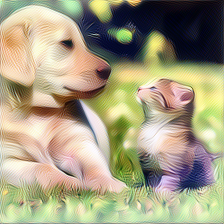

Solve time: 5.69 seconds

Layers: conv2d2



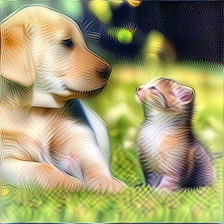

Solve time: 6.61 seconds

Layers: mixed3a



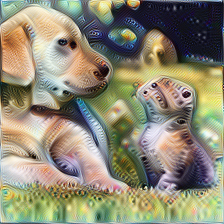

Solve time: 11.48 seconds

Layers: mixed3b



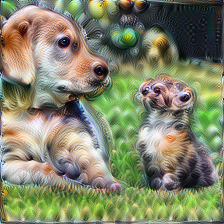

Solve time: 13.74 seconds

Layers: mixed4a



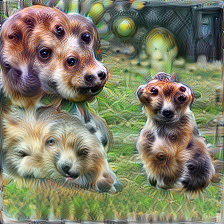

Solve time: 14.48 seconds

Layers: mixed4b



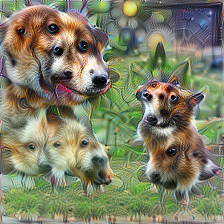

Solve time: 16.04 seconds

Layers: mixed4c



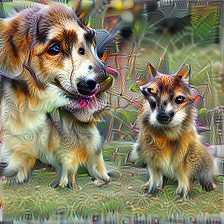

Solve time: 16.91 seconds

Layers: mixed4d



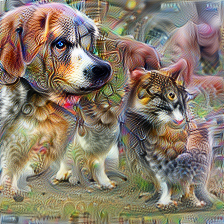

Solve time: 18.74 seconds

Layers: mixed4e



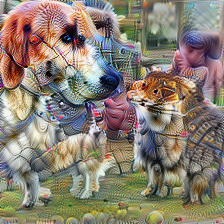

Solve time: 20.17 seconds



In [193]:
ti=[]
for layer in layers:
  print('Layer: '+layer)
  t0 = time.time()
  feature_inversion(image_resized, layer=layer)
  t1 = time.time()
  ti.append(round(t1 - t0, 2))
  print('Solve time: {:.2f} seconds'.format(round(t1 - t0, 2)))
  print ""

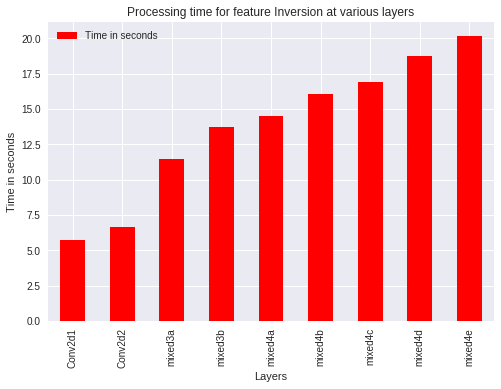

In [196]:
df = pd.DataFrame(
    {'Layers': layers,
     'Time in seconds': ti
    })


# a scatter plot comparing num_children and num_pets
df.plot(kind='bar',x='Layers',y='Time in seconds',color='red')
plt.ylabel("Time in seconds")
plt.xticks(np.arange(9), ('Conv2d1', 'Conv2d2', 'mixed3a' , 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c','mixed4d','mixed4e'))
plt.title("Processing time for feature Inversion at various layers")
plt.xticks(rotation=90)
plt.show()